In [1]:
from LowPrecisionApproxGP.model.inducing_point_kernel import VarPrecisionInducingPointKernel
import gpytorch
# from gpytorch.kernels.inducing_point_kernel import InducingPointKernel
import torch
from LowPrecisionApproxGP.util.GreedyTrain import greedy_train

In [2]:
# Define Model
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood, dtype):
        self._dtype_to_set = dtype
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = VarPrecisionInducingPointKernel(
            gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()), inducing_points=torch.empty(1), likelihood=likelihood, dtype=self._dtype_to_set)

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)



In [3]:
import math
# Create / Reshape Data
train_x = torch.linspace(0, 1, 100).reshape(-1,1)
train_y = torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * math.sqrt(0.04)
train_y = train_y.reshape(-1,1)

# Set up inducing point variables
inducing_point_candidates = train_x.detach().clone()
training_iter = 1000
max_inducing_points = 1000

In [4]:
dtype = torch.float32
# Create Likelihood / Model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood, dtype)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood,model)

# Set to training mode
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters
# Train Model
model = greedy_train((train_x,train_y), model, mll,max_inducing_points,training_iter,dtype=dtype,Use_Max=True,J=20,max_Js=10)

Getting logger
tensor(-77.0622)
tensor(-77.0622)
tensor(-76.9978)
tensor(-74.5379)
tensor(-74.5379)
tensor(-74.5379)
tensor(-74.5379)
tensor(-74.5379)
tensor(-74.5379)
tensor(-74.5379)
tensor(-74.5379)
tensor(-74.5379)
tensor(-74.5379)
tensor(-74.5379)
tensor(-74.5379)
tensor(-74.4494)
tensor(-74.4494)
tensor(-74.4494)
tensor(-74.4494)
tensor(-74.4494)
tensor(-70.5317)
tensor(-70.5317)
tensor(-70.5292)
tensor(-70.5292)
tensor(-70.5292)
tensor(-70.5290)
tensor(-70.5284)
tensor(-70.5284)
tensor(-70.5284)
tensor(-70.5284)
tensor(-70.5284)
tensor(-70.5284)
tensor(-70.5284)
tensor(-70.5284)
tensor(-70.5284)
tensor(-70.5284)
tensor(-70.5284)
tensor(-70.5284)
tensor(-70.5284)
tensor(-70.5284)
tensor(-66.7097)
tensor(-66.7097)
tensor(-66.7096)
tensor(-66.7096)
tensor(-66.7096)
tensor(-66.7096)
tensor(-66.7096)
tensor(-66.7096)
tensor(-66.7091)
tensor(-66.7091)
tensor(-66.7091)
tensor(-66.7091)
tensor(-66.7091)
tensor(-66.7091)
tensor(-66.7091)
tensor(-66.7091)
tensor(-66.7089)
tensor(-66.7089)

--- Logging error ---
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/opt/homebrew/anaconda3/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/opt/homebrew/anaconda3/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/opt/homebrew/anaconda3/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/opt/homebrew/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/homebrew/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File

In [5]:
model.covar_module.inducing_points.dtype

torch.float32

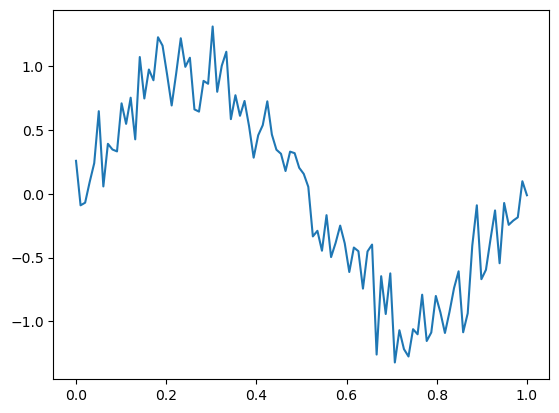

In [6]:
import matplotlib.pyplot as plt

plt.plot(train_x.numpy(),train_y.numpy())